In [2]:
import os

import joblib
import matplotlib.pyplot as plt
import numpy as np

from pysisso.sklearn import SISSORegressor

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Pyt

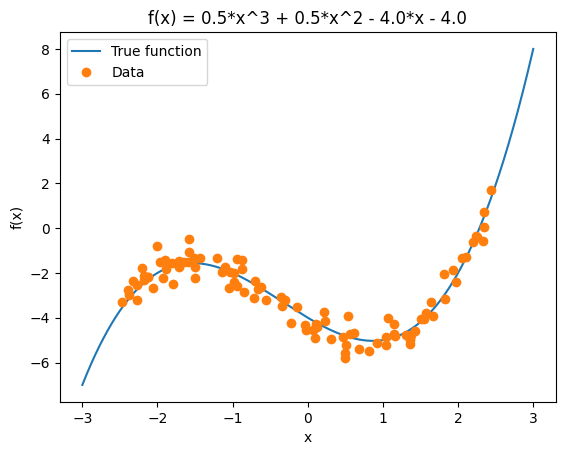

/Users/jiuquansha/dev/data_processing/code/machine_learning_for_STM/machine_learning/pysisso/jobs.py:51: FutureWarning: which is deprecated; use which in shutil instead.
shutil.which has been available since Python 3.3. This will be removed in v2023.
  exe = which(self.SISSO_exe)


ValueError: SISSOJob requires the SISSO executable to be in the path.
Default executable name is "SISSO" and you provided "SISSO".
Download the SISSO code at https://github.com/rouyang2017/SISSO and compile the executable or fix the name of your executable.

In [3]:
# Define general parameters
TITLE = "f(x) = 0.5*x^3 + 0.5*x^2 - 4.0*x - 4.0"
NPOINTS = 100  # Number of data points
SIGMA = 0.5  # Randomness in the data points
PLOT_FIGURES = True  # whether to interactively plot the figures with matplotlib
SAVE_FIGURES = False  # whether to save the matplotlib figures to a file
CLEAN_RUN_DIR = True  # whether to remove the SISSO_dir after the fit

# Set the random seed to always keep the same figure
np.random.seed(42)


# Define the function:
# f(x) = 0.5*x^3 + 0.5*x^2 - 4.0*x - 4.0 (roots = [-2.0, -1.0, 2.0])
def fun(xx, const=1.0):
    return 0.5 * xx ** 3 + 0.5 * xx ** 2 - 4.0 * 0.5 * xx - 4.0 * const


# Define the data set
X = np.random.uniform(-2.5, 2.5, NPOINTS)
y = fun(X) + np.random.normal(0.0, scale=SIGMA, size=NPOINTS)

# Plot true function and data
xlin = np.linspace(-3, 3, 1000)
ylin = fun(xlin)
fig, subplot = plt.subplots()
subplot.plot(xlin, ylin, "-", color="C0", label="True function")
subplot.plot(X, y, "o", color="C1", label="Data")
subplot.set_xlabel("x")
subplot.set_ylabel("f(x)")
subplot.set_title(TITLE)
subplot.legend()
if SAVE_FIGURES:
    fig.savefig("true_data.pdf")
if PLOT_FIGURES:
    plt.show()

# Prepare input
X = X.reshape(-1, 1)  # only one feature, X is initially defined as 1D, sklearn needs 2D
# Get the regressor either from file (if it exists) or fit the data
if os.path.exists("sisso_regressor.joblib"):
    sisso_regressor = joblib.load("sisso_regressor.joblib")
else:
    sisso_regressor = SISSORegressor(
        rung=1,
        opset="(+)(*)(^2)(^3)(^-1)(cos)(sin)",
        desc_dim=3,
        clean_run_dir=CLEAN_RUN_DIR,
    )

    sisso_regressor.fit(X, y)
# Predict the data
ylin_pred = sisso_regressor.predict(xlin)

# Dump model to file
joblib.dump(sisso_regressor, "sisso_regressor.joblib")

# Plot the true and predicted functions, together with the data
fig, subplot = plt.subplots()
subplot.plot(xlin, ylin, "-", color="C0", label="True function")
subplot.plot(X, y, "o", color="C1", label="Data")
subplot.plot(xlin, ylin_pred, "-", color="C2", label="Predicted function")
subplot.set_xlabel("x")
subplot.set_ylabel("f(x)")
subplot.set_title(TITLE)
subplot.legend()
if SAVE_FIGURES:
    fig.savefig("true_data_pred.pdf")
if PLOT_FIGURES:
    plt.show()